In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Use Pandas to import the data from epa-sea-level.csv.

In [13]:
df = pd.read_csv("./data/epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

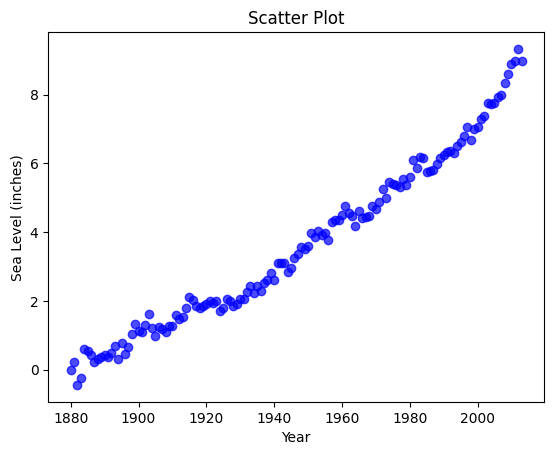

In [14]:
plt.scatter(df["Year"],df["CSIRO Adjusted Sea Level"], color='blue', marker='o', alpha=0.7)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Scatter Plot")

# Display the plot
plt.show()

### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

Predicted sea level in 2050: 10.18


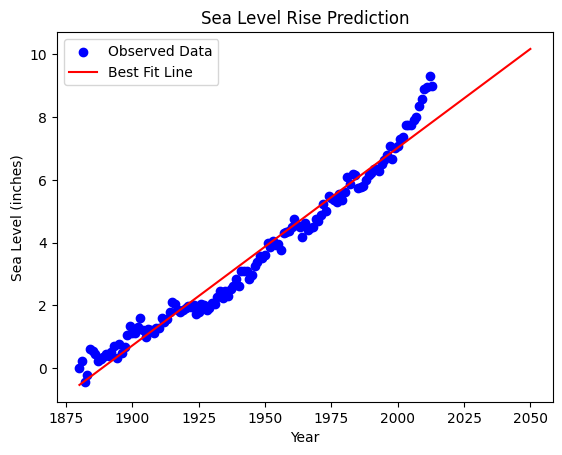

In [15]:
# Create scatter plot
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Observed Data", color="blue")

slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

def line(x):
    return slope * x + intercept

x_pred = list(range(min(df["Year"]), 2051))
y_pred = [line(x) for x in x_pred]

plt.plot(x_pred, y_pred, color="red", label="Best Fit Line")

# Predict sea level in 2050
sea_level_2050 = line(2050)
print(f"Predicted sea level in 2050: {sea_level_2050:.2f}")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")  # adjust units if needed
plt.title("Sea Level Rise Prediction")
plt.legend()
plt.show()

### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

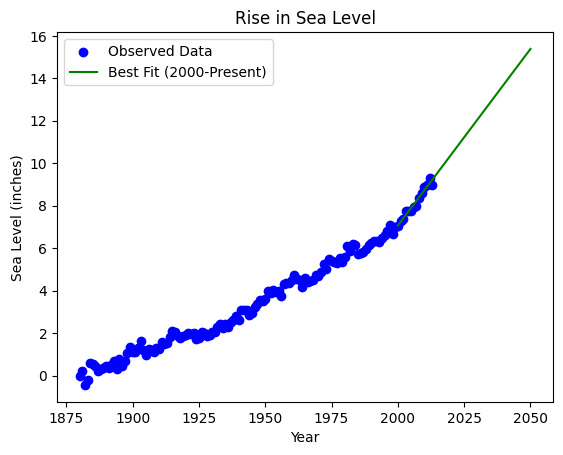

In [16]:
# Create scatter plot
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Observed Data", color="blue")

slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

def line(x, slope, intercept):
    return slope * x + intercept

df_recent = df[df["Year"] >= 2000]
slope_recent, intercept_recent, r_value, p_value, std_err = linregress(
    df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"]
)

x_recent = range(2000, 2051)
y_recent = [line(x, slope_recent, intercept_recent) for x in x_recent]
plt.plot(x_recent, y_recent, color="green", label="Best Fit (2000-Present)")

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.legend()